Two-Slit Experiment
=====
# Barry O'Donnell

## 10/10/2019

This assignment focuses on the famous Two-slit experiment, first demonstrated by Thomas Young in 1801.

In this assignment, I will be replicating the results of the experiment using Python, and creating a model of the experiment in the process. To help me do this, I will be using these formulae;
### $$ I = I_0 \left[\frac{sin(\alpha)}{\alpha}\right] ^2 [cos(\beta)]^2 $$
where;
### $$ \alpha = \frac{\pi a}{\lambda}sin(\theta) $$ $$ \beta = \frac{\pi d}{\lambda}sin(\theta) $$
### $$ tan(\theta) = \frac{y}{L} $$
or;
### $$ \theta = arctan(\frac{y}{L}) $$
where;
* '$I$' is intensity, $I_0$ is initial intensity ($W/m^2$),
* '$a$' is width of one of the slits ($mm$),
* '$d$' is the distance between slits ($mm$),
* '$L$' is the distance from the slits to the screen ($mm$),
* '$\lambda$' is the wavelength of the light ($nm$),
* '$y$' is the distance between along the plane ($mm$).

### Task 1
* I will be using the parameters provided to construct a 1-D plot of the intensity pattern produced after the light passes through the the two slits,

### Task 2
* Expand on *'Task 1'* and overlay what the intensity pattern would be if light passed through only 1 slit,

### Task 3
* Further develop my programme to simulate how the intensity pattern would appear in 2-D (such as on a clear white plane),

### Task 4
* Work out the diffraction found in the $z$ axis and apply this to the 2-D image found in *Task 3*, and receive an accurate representation of the diffraction pattern found from a real life experiment.

In [1]:
## Begin by importing necessary modules
import matplotlib.pyplot as plt
import numpy as np

## Initialise constants to be used throughout experiment
##  Constants in form of millimetres 
a    = 0.09
L    = 480
d    = 0.4
lamb = 670 * 10**-6

## Defining aspect ratio for later plot use
##  Here, aspect ratio is constantly 3:2
aspect = 12
aspect_ratio = (aspect,aspect*2/3)


## Define functions for variables
##  'alpha' and 'beta' are both variables
##   used in the function for intensity
def alpha(theta):
    return (np.pi * a * np.sin(theta)/lamb)


def beta(theta):
    return (np.pi * d * np.sin(theta)/lamb)


def I(theta, I_0=1, single=False):
    """ Function used to calculate intensity on the plane
        Takes arguments;
            'theta'  = int. Angle in radians off the center axis
            'I_0'    = int. Initial intensity of light, set to '1' to 
                        mimic I/I_0 relationship
            'single' = Boolean. Decides if the observation is made on
                        2 slits or just a single slit.
    """
    
    if single is False:
        return (I_0 * (np.sin(alpha(theta)) / alpha(theta))**2 * np.cos(beta(theta))**2)
    
    else:
        return (I_0 * (np.sin(alpha(theta)) / alpha(theta))**2)

### Task 1
Using the above constants, I will plot the predicted 1-D intensity pattern of $\frac{I}{I_0}$.

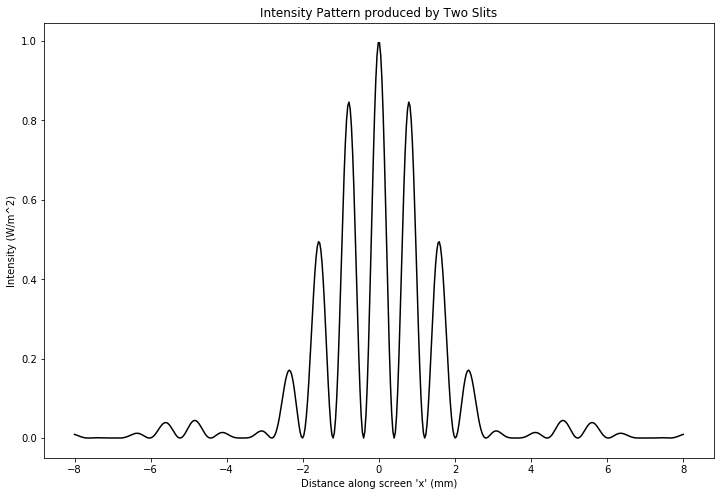

In [2]:
## Set 'n' and 'limits' for linspace function
n = 500
lims = 8
y = np.linspace(-lims, lims, num=n)

## Calculate theta for intensity function
theta = np.arctan(y / L)

## Begin plot definitions
plt.figure(1, aspect_ratio)
plt.plot(y, I(theta), 'k')
plt.title('Intensity Pattern produced by Two Slits')
plt.xlabel("Distance along screen 'x' (mm)")
plt.ylabel('Intensity (W/m^2)')
plt.show(1)

### Task 2
Expand on the previous cell, and include an overlay of what the pattern would look like with only a single slit.

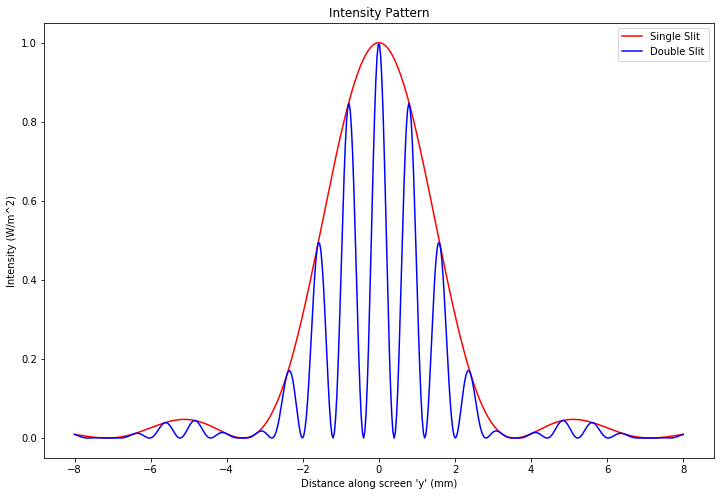

In [3]:
## Set 'n' and 'limits' for linspace function
n = 500
lims = 8
y = np.linspace(-lims, lims, num=n)

## Calculate theta for intensity function
theta = np.arctan(y / L)

## Begin plot definitions
##  Overlay single-slit graph over previous graph
plt.figure(1, aspect_ratio)
plt.plot(y, I(theta, single=True), 'r', label='Single Slit')
plt.plot(y, I(theta), 'b', label='Double Slit')
plt.title('Intensity Pattern')
plt.xlabel("Distance along screen 'y' (mm)")
plt.ylabel('Intensity (W/m^2)')
plt.legend()
plt.show(1)

### Task 3
Using the result found in *Task 2*, I will construct a 2-D array. The array will consist of the values from the $I$ function strung together vertically by using the 'np.concatenate' function.

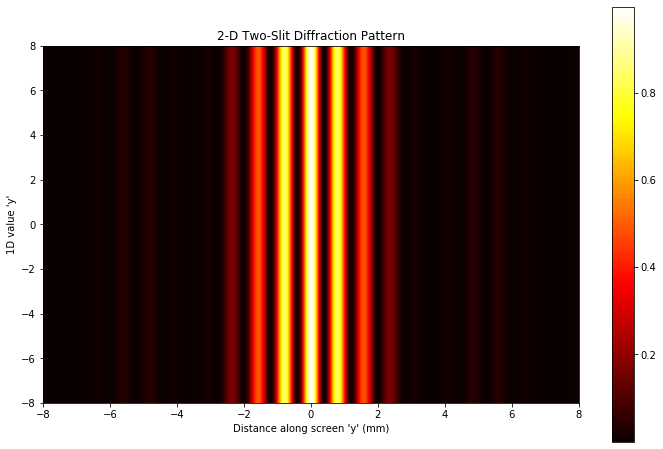

In [4]:
## Set 'n' and 'limits' for linspace function, same as before
n = 500
lims = 8
y = np.linspace(-lims, lims, num=n)
theta = np.arctan(y / L)

## Convert Intensity array into (n, 1) layer
intense_1D_layer = np.expand_dims(I(theta), 0)

## Begin joining 1D layers together to create a 2D array.
##  This is equivalent to stacking the same layer, over and over, top-to-bottom.
intense_2D = np.concatenate((intense_1D_layer, intense_1D_layer), axis=0)

## (n-2) is chosen here as the first 2 layers have been added manually.
for i in range(n-2):
    intense_2D = np.concatenate((intense_2D, intense_1D_layer), axis=0)

## Using 'imshow', I can convert the 2D array into an image.
##  In this image, the brightest pixel is the highest value, and the
##  darkest pixel is the lowest value. The rest is scaled between these values.
plt.figure(1,aspect_ratio)
plt.imshow(intense_2D, cmap='hot',aspect = 2/3, interpolation='bicubic', extent=(-lims,lims,-lims,lims))
plt.title('2-D Two-Slit Diffraction Pattern')
plt.xlabel("Distance along screen 'y' (mm)")
plt.ylabel("1D value 'y'")
plt.colorbar()
plt.show(1)

### Task 4
From *Task 3*, we receive a 2-D diffraction pattern for the two-slit pattern when not accounting for $z$ direction diffraction.

In *Task 4*, I will expand on *Task 3* by introducing this variable. This will be done by using the formula;
### $$ \delta = \frac{\pi b}{\lambda}sin(\theta) $$ 
### $$ I_{z} = I_0 \left[\frac{sin(\delta)}{\delta}\right] ^2 $$
Where; 
* $b$ is the slit height ($mm$)
* $I_z$ is the intensity in the $z$ direction ($W/m^2$)

After obtaining $I_z$, I will construct a similar 2-D array to the one in *Task 3* but for the $z$ direction.

When this 2-D array is found, I will get the product of the two arrays, and show the image resulting from that product.

In [5]:
## Introduce new constant, 'b'
b = 1

## Define new diffraction function for 'z' direction
def delta(theta):
    return (np.pi * b * np.sin(theta)/lamb)

## Intensity function for 'z' direction
def I_z(theta, I_0=1):
    """ Function used to calculate intensity on the plane in the 'z' direction
        Takes arguments;
            'theta'  = int. Angle in radians off the center axis
            'I_0'    = int. Initial intensity of light, set to '1' to 
                        mimic I/I_0 relationship
    """
    
    return (I_0 * (np.sin(delta(theta)) / delta(theta))**2)

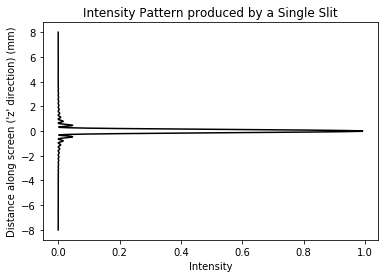

In [6]:
## Checking to see if I_z produced a single-slit diffraction pattern
##  The pattern should resemble a horizontal single slit intensity pattern, but with
##  the axes swapped
plt.plot(I_z(theta), y, 'k')
plt.title('Intensity Pattern produced by a Single Slit')
plt.xlabel('Intensity')
plt.ylabel("Distance along screen ('z' direction) (mm)")
plt.show()

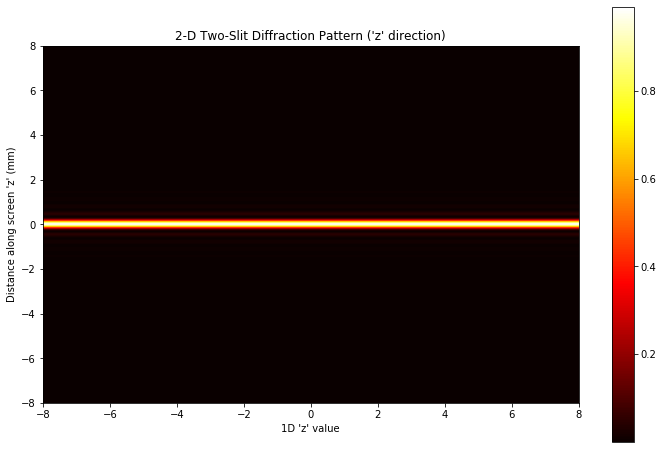

In [9]:
## Set 'n' and 'limits' for linspace function, same as before
n = 500
lims = 8
y = np.linspace(-lims, lims, num=n)
theta = np.arctan(y / L)

## Convert Intensity array into (1, n) layer
## Similar to 'Task 3', with the exception of layering the 1D layers
##  left-to-right. This creates a horizontal single-slit diffraction pattern.
intense_1D_zlayer = np.expand_dims(I_z(theta), 1)

intense_2D_z = np.concatenate((intense_1D_zlayer, intense_1D_zlayer), axis=1)

## (n-2) is chosen here as the first 2 layers have been added manually.
for i in range(n-2):
    intense_2D_z = np.concatenate((intense_2D_z, intense_1D_zlayer), axis=1)


## Using 'imshow', I can convert the 2D array into an image.
##  In this image, the brightest pixel is the highest value, and the
##  darkest pixel is the lowest value. The rest is scaled between these.
plt.figure(1,aspect_ratio)
plt.imshow(intense_2D_z, cmap='hot',aspect = 2/3, interpolation='bicubic', extent=(-lims,lims,-lims,lims))
plt.title("2-D Two-Slit Diffraction Pattern ('z' direction)")
plt.xlabel("1D 'z' value")
plt.ylabel("Distance along screen 'z' (mm)")
plt.colorbar()
plt.show(1)

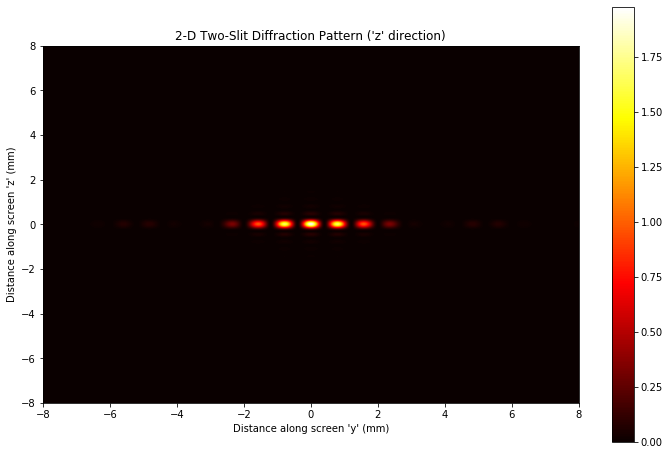

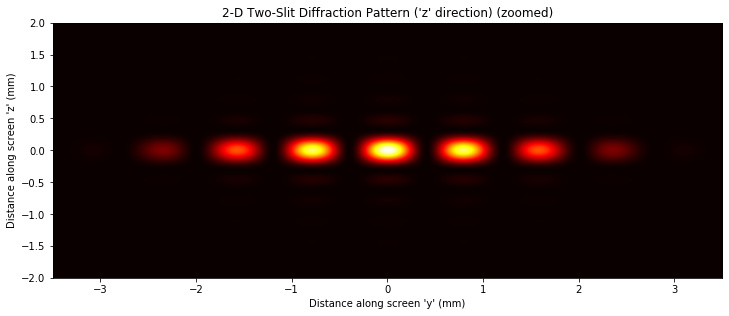

In [10]:
## The diffraction pattern will be the product of the two y-z intensities
##  The intensity of the vertical diffraction pattern is doubled as there are
##  two slits producing 2 independent patterns involved for the two slit experiment
full_diff_pattern = intense_2D * (intense_2D_z * 2)

plt.figure(1,figsize=aspect_ratio)
plt.imshow(full_diff_pattern, cmap='hot',aspect = 2/3, interpolation='bicubic', extent=(-lims,lims,-lims,lims))
plt.title("2-D Two-Slit Diffraction Pattern ('z' direction)")
plt.xlabel("Distance along screen 'y' (mm)")
plt.ylabel("Distance along screen 'z' (mm)")
plt.colorbar()
plt.show(1)

plt.figure(2,aspect_ratio)
plt.imshow(full_diff_pattern, cmap='hot',aspect = 2/3, interpolation='bicubic', extent=(-lims,lims,-lims,lims))
plt.title("2-D Two-Slit Diffraction Pattern ('z' direction) (zoomed)")
plt.xlabel("Distance along screen 'y' (mm)")
plt.ylabel("Distance along screen 'z' (mm)")
plt.xlim(-3.5,3.5)
plt.ylim(-2,2)
plt.show(2)

Pattern resembles the real life results from the experiment!